In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from scipy.optimize import curve_fit
import matplotlib

In [2]:
file_path = 'H:\\Shared drives\\SLab\\Multimode\\experiment\\240911\\RAM_paper_results\\datasets\\'
file_name = 'Cavity_Temp_Parity_corrected1211.csv'
# Load CSV file
data = pd.read_csv(file_path+file_name)

# Display the first few rows
print(data.keys())

Index(['file_name', 'mode', 'T', 'E', 'threshold_list', 'counts_list',
       'n_reps', 'man_no_for_parity', 'reset', 'single_photon'],
      dtype='object')


In [4]:
data

,file_name,mode,T,E,threshold_list,counts_list,n_reps,man_no_for_parity,reset,single_photon
0,00163_cavity_temperature_sweep_parity_with_wit...,M1,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[76369, 70731, 70059, 64775, 59324, 54685, 541...",91122,1,False,True
1,00164_cavity_temperature_sweep_parity_with_wit...,M1,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[582, 517, 499, 469, 419, 390, 382, 353, 324, ...",98559,1,False,False
2,00165_cavity_temperature_sweep_parity_with_wit...,M1-S1,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[506, 462, 441, 395, 336, 308, 301, 271, 252, ...",98600,1,False,False
3,00166_cavity_temperature_sweep_parity_with_wit...,M1-S2,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[473, 441, 419, 379, 331, 291, 274, 245, 223, ...",98620,1,False,False
4,00167_cavity_temperature_sweep_parity_with_wit...,M1-S3,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[477, 418, 408, 370, 324, 299, 283, 261, 239, ...",98594,1,False,False
5,00168_cavity_temperature_sweep_parity_with_wit...,M1-S4,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[497, 459, 436, 401, 346, 323, 308, 279, 256, ...",98622,1,False,False
6,00169_cavity_temperature_sweep_parity_with_wit...,M1-S5,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[484, 435, 417, 380, 321, 294, 278, 254, 235, ...",98560,1,False,False
7,00170_cavity_temperature_sweep_parity_with_wit...,M1-S6,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[885, 821, 788, 733, 654, 597, 582, 519, 483, ...",98402,1,False,False
8,00171_cavity_temperature_sweep_parity_with_wit...,M1-S7,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[469, 422, 400, 375, 334, 306, 296, 269, 247, ...",98506,1,False,False
9,00172_cavity_temperature_sweep_parity_with_wit...,M1-D1,[[9.88540058e-01 1.14599419e-02 0.00000000e+00...,[[0.495575 0.004425]\n [0.0119 0.4881 ]\n [...,"[100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...","[472, 430, 407, 382, 334, 301, 290, 261, 241, ...",98480,1,False,False


# Calculating M1 and S1 temeprature

## Efficiencies

In [37]:
# M2 efficiency
import ast 
m2 = ast.literal_eval(data.loc[ 26, 'counts_list'])
m2_eff_threshold_list = ast.literal_eval(data.loc[ 26, 'threshold_list'])
m2_nreps = data.loc[ 26, 'n_reps']

m2_eff = m2/m2_nreps
m2_eff_errs = np.sqrt(m2_eff*(1-m2_eff)/m2_nreps)

In [38]:
# M1 Effeciency
m1 = ast.literal_eval(data.loc[ 0, 'counts_list'])
m1_eff_threshold_list = ast.literal_eval(data.loc[ 0, 'threshold_list'])
m1_nreps = data.loc[ 0, 'n_reps']

m1_eff = m1/m1_nreps
m1_eff_errs = np.sqrt(m1_eff*(1-m1_eff)/m1_nreps)

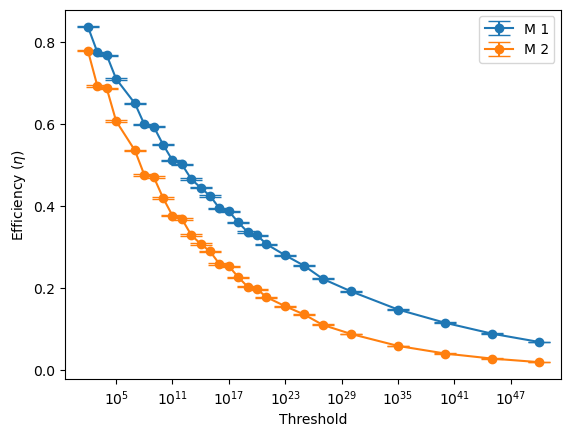

In [44]:
# plt.plot(m1_eff_threshold_list, m1_eff, label='Mode 1')
# plt.plot(m2_eff_threshold_list, m2_eff, label='Mode 2')
plt.errorbar(m1_eff_threshold_list, m1_eff, yerr=m1_eff_errs, label='M 1', fmt='-o', capsize=8)
plt.errorbar(m2_eff_threshold_list, m2_eff, yerr=m2_eff_errs, label='M 2', fmt='-o', capsize=8)
plt.ylabel(r'Efficiency ($\eta$)')
plt.xlabel('Threshold')
plt.xscale('log')
plt.legend()

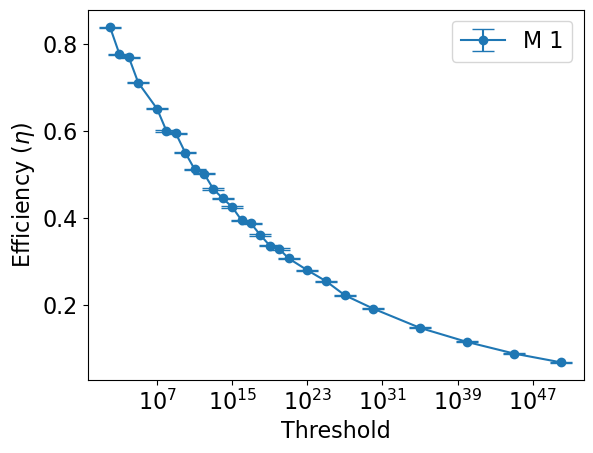

In [66]:
plt.rcParams.update({'font.size': 16})
plt.errorbar(m1_eff_threshold_list, m1_eff, yerr=m1_eff_errs, label='M 1', fmt='-o', capsize=8)
#plt.errorbar(m2_eff_threshold_list, m2_eff, yerr=m2_eff_errs, label='M 2', fmt='-o', capsize=8)
plt.ylabel(r'Efficiency ($\eta$)')
plt.xlabel('Threshold')
plt.xscale('log')
plt.legend()
plt.savefig('figures/efficiency_vs_threshold.png', dpi=300)

## M1 and S1 temperatures

In [57]:
def find_zero_point(f, a, b, yita1, yita2, nbar, tolerance=1e-6, max_iterations=100):
    """
    Find the zero point of a monotonic function f(x, c) using the bisection method.

    Parameters:
        f (callable): The monotonic function f(x, c).
        a (float): The start of the interval [a, b].
        b (float): The end of the interval [a, b].
        c (float): The parameter for f(x, c).
        tolerance (float): The accuracy of the result.
        max_iterations (int): The maximum number of iterations to perform.

    Returns:
        float: The zero point x0 where f(x0, c) ≈ 0.

    Raises:
        ValueError: If f(a, c) and f(b, c) do not have opposite signs.
    """
    if f(a, yita1, yita2, nbar) * f(b, yita1, yita2, nbar) > 0:
        raise ValueError("The function must have opposite signs at the endpoints of the interval.")
    
    iteration = 0
    while (b - a) / 2 > tolerance and iteration < max_iterations:
        mid = (a + b) / 2
        f_mid = f(mid, yita1, yita2, nbar)
        
        if f_mid == 0:  # Found exact zero
            return mid
        elif f_mid * f(a, yita1, yita2, nbar) < 0:
            b = mid
        else:
            a = mid
        
        iteration += 1
    
    return (a + b) / 2  # Return the midpoint as the best estimate


def return_dark_counts_and_efficiency(data, idx, frequency):
    '''
    Given dataset and df_idx, return dark counts and efficiency for a given mode
    *** relies on m1_eff and m2_eff being defined in the global scope ***
    '''
    
    mode_counts = ast.literal_eval(data.loc[ idx, 'counts_list'])
    mode_threshold_list = ast.literal_eval(data.loc[ idx, 'threshold_list'])
    mode_nreps = data.loc[ idx, 'n_reps']

    mode_counts_norm = mode_counts/mode_nreps

    # now compute temp (assuming mode was M1 or swapped into M1)
    dark_counts = mode_counts_norm#np.array(dark_counts_list) / n
    dark_counts_err = np.sqrt(dark_counts *(1 - dark_counts) / mode_nreps) # sqrt(p(1-p)/n)
    #print(mode_counts)
    # dark_counts_err = np.sqrt(np.array(dark_counts_list))/n

    thermal_photon_population = []
    thermal_photon_population_err = []
    for i in range(len(dark_counts)):
        ratio = dark_counts[i] / m1_eff[i]
        err  = 1 * np.sqrt((dark_counts_err[i] / m1_eff[i])**2 + (m1_eff_errs[i] * dark_counts[i] / m1_eff[i]**2)**2)
        thermal_photon_population.append(ratio)
        thermal_photon_population_err.append(err)

    # above is thermal photon in M1 due to mode being swapped in and M2 idle
    # need to get rid of M2 idle contribution

    # case 1, just divide the photon number by 2 [This is wrong]
    now = np.array(thermal_photon_population) / 2
    now_err = np.array(thermal_photon_population_err) / 2
    tempr = []
    tempr_err = []
    for i in range(len(now)):
        temp = 48 * frequency / (np.log(1 + 1 / now[i]))
        temp_err = np.abs(temp * 1/(np.log(1 + 1 / now[i])) * (1/(1 + 1/now[i])) * now_err[i] / (now[i] **2))
        tempr.append(temp)
        tempr_err.append(temp_err)

    # case 2, properly doing M2 correction
    def f(x, yita1, yita2, nbar):
        f1 = 4.984
        f2 = 5.158
        # yita1 = 0.8
        # yita2 = 0.6
        # nbar = 0.004
        return yita1/(-1+np.exp(48*f1/x))+yita2/(-1+np.exp(48*f2/x))-nbar

    temperature1 = []  # CURRENTLY USING OLD ERRS BUT PLS UPDATE WITH NEW
    for i in range(len(dark_counts)):
        x0 = find_zero_point(f, 20,80, m1_eff[i], m2_eff[i], dark_counts[i])
        temperature1.append(x0)
    dark_counts1 = []
    dark_counts1_err = []
    for i in range(len(temperature1)):
        dark_counts1.append(1/(-1+np.exp(48*frequency/temperature1[i])))
        dark_counts1_err.append((48*frequency/temperature1[i]**2*np.exp(48*frequency/temperature1[i]))/(-1+np.exp(48*frequency/temperature1[i]))**2)
    print(frequency)
    
    return mode_threshold_list, dark_counts1, dark_counts1_err, temperature1, tempr_err

In [58]:
# for m1 
m1_args = return_dark_counts_and_efficiency(data, 1, 4.984)
# for s1
s1_args = return_dark_counts_and_efficiency(data, 2, 4.984 + 0.34941)


4.984
5.33341


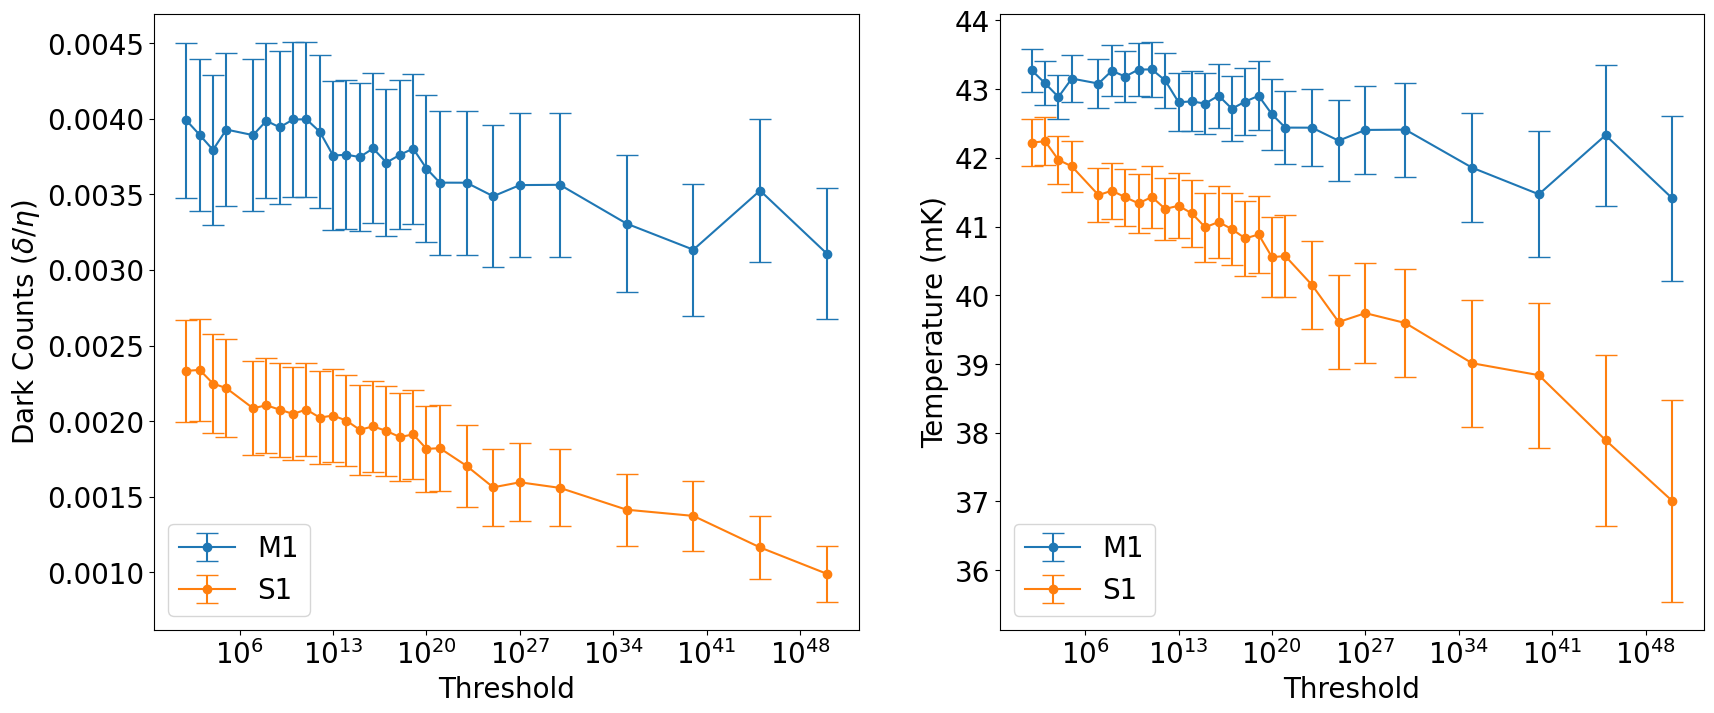

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
#increase size of axis labels
plt.rcParams.update({'font.size': 20})

# Subfigure 1 - dark counts 
ax1.errorbar(m1_args[0], m1_args[1], yerr=m1_args[2], label='M1', fmt='-o', capsize=8)
ax1.errorbar(s1_args[0], s1_args[1], yerr=s1_args[2], label='S1', fmt='-o', capsize=8)
ax1.set_ylabel(r'Dark Counts ($\delta/\eta$)')
ax1.set_xlabel('Threshold')
ax1.set_xscale('log')
ax1.legend()

# Subfigure 2 - temperature
ax2.errorbar(m1_args[0], m1_args[3], yerr=m1_args[4], label='M1', fmt='-o', capsize=8)
ax2.errorbar(s1_args[0], s1_args[3], yerr=s1_args[4], label='S1', fmt='-o', capsize=8)
ax2.set_ylabel('Temperature (mK)')
ax2.set_xlabel('Threshold')
ax2.set_xscale('log')
ax2.legend()

plt.show()
fig.savefig('figures\dark_counts_temperature.pdf', dpi = 300)



In [5]:
path2 = 'H:\\Shared drives\\SLab\Multimode\\figure\\temperature\\'
x1 = np.load(path2+'p0_lists.npy')
y1 = np.load(path2+'p1_lists.npy')
x2 = np.load(path2+'p0_lists2.npy')
y2 = np.load(path2+'p1_lists2.npy')
m2 = np.load(path2+'M2counts.npy')

In [10]:
data.iloc[26]

file_name            00189_cavity_temperature_sweep_parity_with_wit...
mode                                                                M2
T                    [[9.88540058e-01 1.14599419e-02 0.00000000e+00...
E                    [[0.495575 0.004425]\n [0.0119   0.4881  ]\n [...
threshold_list       [100.0, 1000.0, 10000.0, 100000.0, 10000000.0,...
counts_list          [70089, 62390, 61848, 54660, 48224, 42854, 424...
n_reps                                                           89915
man_no_for_parity                                                    1
reset                                                            False
single_photon                                                     True
Name: 26, dtype: object

In [17]:
import ast 
m2 = ast.literal_eval(data.loc[ 26, 'counts_list'])
m2_threshold_list = ast.literal_eval(data.loc[ 26, 'threshold_list'])
m2_nreps = data.loc[ 26, 'n_reps']

m2_eff = m2/m2_nreps

In [18]:
m1 = ast.literal_eval(data.loc[ 0, 'counts_list'])
m1_threshold_list = ast.literal_eval(data.loc[ 0, 'threshold_list'])
m1_nreps = data.loc[ 0, 'n_reps']

m1_eff = m1/m1_nreps

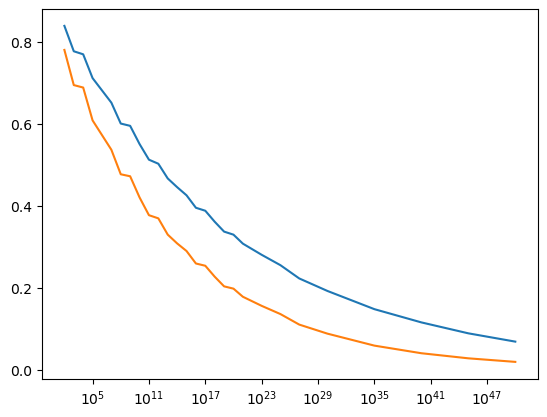

In [21]:
plt.plot(m1_threshold_list, m1_eff, label='Mode 1')
plt.plot(m2_threshold_list, m2_eff, label='Mode 2')
plt.xscale('log')

In [19]:
m1_dark_counts = ast.literal_eval(data.loc[ 1, 'counts_list'])
m1_dark_threshold_list = ast.literal_eval(data.loc[ 1, 'threshold_list'])
m1_dark_nreps = data.loc[ 1, 'n_reps']

m1_dark_norm = m1_dark_counts/m1_dark_nreps


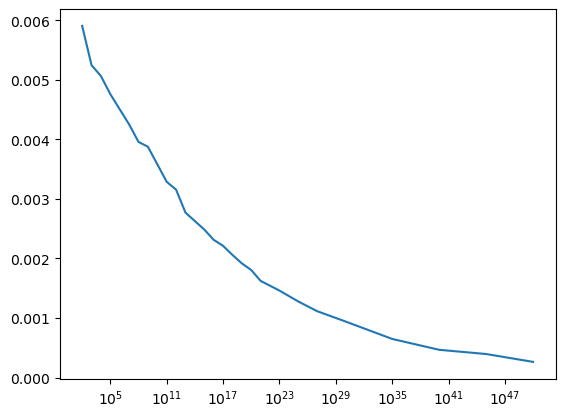

In [23]:
plt.plot(m1_dark_threshold_list, m1_dark_norm, label='Mode 1 Dark')
plt.xscale('log')

In [145]:
ratio = []
for ii in range(len(x2)):
    ratio.append(y2[ii]/x2[ii])

In [27]:
oscil_pattern = [1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [37]:
threshold_list = ast.literal_eval(data['threshold_list'][0])
efficiency_list = ast.literal_eval(data['counts_list'][0])
dark_counts_list = ast.literal_eval(data['counts_list'][2])

In [154]:
m2

array([0.30344, 0.289  , 0.26254, 0.25105, 0.21601, 0.20156, 0.18449,
       0.17647, 0.1603 , 0.15353, 0.13951, 0.13049, 0.12208, 0.11134,
       0.10619, 0.09719, 0.09271, 0.08432, 0.07916, 0.06733, 0.05863,
       0.05097, 0.04014, 0.02785, 0.01898, 0.01239, 0.0081 ])

<ipython-input-107-df04180c1246>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("coolwarm")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

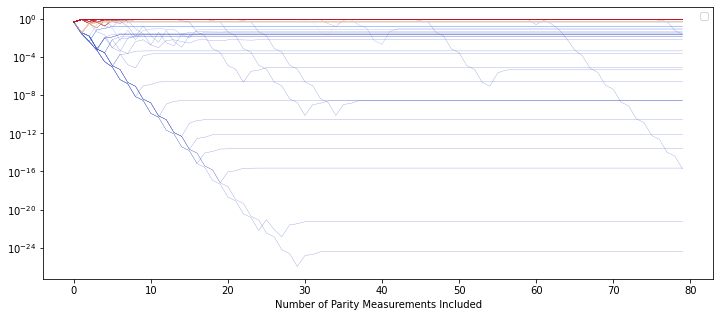

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

for x in x2:
    norm = matplotlib.colors.Normalize(
        vmin=1e-20, vmax=1
    )
    cmap = matplotlib.cm.get_cmap("coolwarm")
    color = cmap(norm(x[-1]))
    ax.semilogy(
        x, "-", linewidth=0.2, alpha=1, color=color
    )    

#ylabel('P(t=0)')
plt.xlabel('Number of Parity Measurements Included')
#title('Looking at a measurement sequence to get max threshold')
plt.legend()
plt.tight_layout

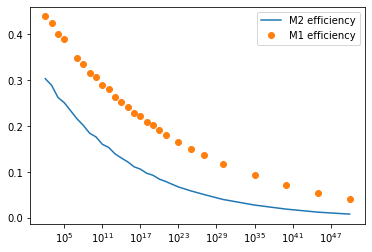

In [149]:
plt.plot(threshold_list, m2, label='M2 efficiency')
plt.plot(threshold_list, efficiency_list1, 'o', label='M1 efficiency')
plt.xscale('log')
plt.legend()

In [24]:
def find_zero_point(f, a, b, yita1, yita2, nbar, tolerance=1e-6, max_iterations=100):
    """
    Find the zero point of a monotonic function f(x, c) using the bisection method.

    Parameters:
        f (callable): The monotonic function f(x, c).
        a (float): The start of the interval [a, b].
        b (float): The end of the interval [a, b].
        c (float): The parameter for f(x, c).
        tolerance (float): The accuracy of the result.
        max_iterations (int): The maximum number of iterations to perform.

    Returns:
        float: The zero point x0 where f(x0, c) ≈ 0.

    Raises:
        ValueError: If f(a, c) and f(b, c) do not have opposite signs.
    """
    if f(a, yita1, yita2, nbar) * f(b, yita1, yita2, nbar) > 0:
        raise ValueError("The function must have opposite signs at the endpoints of the interval.")
    
    iteration = 0
    while (b - a) / 2 > tolerance and iteration < max_iterations:
        mid = (a + b) / 2
        f_mid = f(mid, yita1, yita2, nbar)
        
        if f_mid == 0:  # Found exact zero
            return mid
        elif f_mid * f(a, yita1, yita2, nbar) < 0:
            b = mid
        else:
            a = mid
        
        iteration += 1
    
    return (a + b) / 2  # Return the midpoint as the best estimate



In [138]:
# calculate temperature
n = 200000
frequency = 4.984 
efficiency_list1 = np.array(efficiency_list)/n
efficiency_list1_err = np.sqrt(efficiency_list1*(1-efficiency_list1)/n)
# efficiency_list1_err = np.sqrt(np.array(efficiency_list1))/n

dark_counts = np.array(dark_counts_list) / n
dark_counts_err = np.sqrt(dark_counts *(1 - dark_counts) / n) # sqrt(p(1-p)/n)
# dark_counts_err = np.sqrt(np.array(dark_counts_list))/n

thermal_photon_population = []
thermal_photon_population_err = []
for i in range(len(dark_counts)):
    ratio = dark_counts[i] / efficiency_list1[i]
    err  = 1 * np.sqrt((dark_counts_err[i] / efficiency_list1[i])**2 + (efficiency_list1_err[i] * dark_counts[i] / efficiency_list1[i]**2)**2)
    thermal_photon_population.append(ratio)
    thermal_photon_population_err.append(err)

# case 1, just divide the photon number by 2
now = np.array(thermal_photon_population) / 2
now_err = np.array(thermal_photon_population_err) / 2
tempr = []
tempr_err = []
for i in range(len(now)):
    temp = 48 * frequency / (np.log(1 + 1 / now[i]))
    temp_err = np.abs(temp * 1/(np.log(1 + 1 / now[i])) * (1/(1 + 1/now[i])) * now_err[i] / (now[i] **2))
    tempr.append(temp)
    tempr_err.append(temp_err)


# case 2, properly doing M2 correction
def f(x, yita1, yita2, nbar):
    f1 = 4.984
    f2 = 5.158
    # yita1 = 0.8
    # yita2 = 0.6
    # nbar = 0.004
    return yita1/(-1+np.exp(48*f1/x))+yita2/(-1+np.exp(48*f2/x))-nbar

temperature1 = []
for i in range(len(dark_counts)):
    x0 = find_zero_point(f, 20,80, efficiency_list1[i], m2[i], dark_counts[i])
    temperature1.append(x0)
dark_counts1 = []
dark_counts1_err = []
for i in range(len(temperature1)):
    dark_counts1.append(1/(-1+np.exp(48*frequency/temperature1[i])))
    dark_counts1_err.append((48*frequency/temperature1[i]**2*np.exp(48*frequency/temperature1[i]))/(-1+np.exp(48*frequency/temperature1[i]))**2)

# with new data

In [25]:
# calculate temperature

frequency = 4.984 
efficiency_list1 = m1_eff #np.array(efficiency_list)/m1_nreps
efficiency_list1_err = np.sqrt(efficiency_list1*(1-efficiency_list1)/m1_nreps)
# efficiency_list1_err = np.sqrt(np.array(efficiency_list1))/n

dark_counts = m1_dark_norm#np.array(dark_counts_list) / n
dark_counts_err = np.sqrt(dark_counts *(1 - dark_counts) / m1_dark_nreps) # sqrt(p(1-p)/n)
# dark_counts_err = np.sqrt(np.array(dark_counts_list))/n

thermal_photon_population = []
thermal_photon_population_err = []
for i in range(len(dark_counts)):
    ratio = dark_counts[i] / efficiency_list1[i]
    err  = 1 * np.sqrt((dark_counts_err[i] / efficiency_list1[i])**2 + (efficiency_list1_err[i] * dark_counts[i] / efficiency_list1[i]**2)**2)
    thermal_photon_population.append(ratio)
    thermal_photon_population_err.append(err)

# case 1, just divide the photon number by 2
now = np.array(thermal_photon_population) / 2
now_err = np.array(thermal_photon_population_err) / 2
tempr = []
tempr_err = []
for i in range(len(now)):
    temp = 48 * frequency / (np.log(1 + 1 / now[i]))
    temp_err = np.abs(temp * 1/(np.log(1 + 1 / now[i])) * (1/(1 + 1/now[i])) * now_err[i] / (now[i] **2))
    tempr.append(temp)
    tempr_err.append(temp_err)


# case 2, properly doing M2 correction
def f(x, yita1, yita2, nbar):
    f1 = 4.984
    f2 = 5.158
    # yita1 = 0.8
    # yita2 = 0.6
    # nbar = 0.004
    return yita1/(-1+np.exp(48*f1/x))+yita2/(-1+np.exp(48*f2/x))-nbar

temperature1 = []
for i in range(len(dark_counts)):
    x0 = find_zero_point(f, 20,80, efficiency_list1[i], m2_eff[i], dark_counts[i])
    temperature1.append(x0)
dark_counts1 = []
dark_counts1_err = []
for i in range(len(temperature1)):
    dark_counts1.append(1/(-1+np.exp(48*frequency/temperature1[i])))
    dark_counts1_err.append((48*frequency/temperature1[i]**2*np.exp(48*frequency/temperature1[i]))/(-1+np.exp(48*frequency/temperature1[i]))**2)

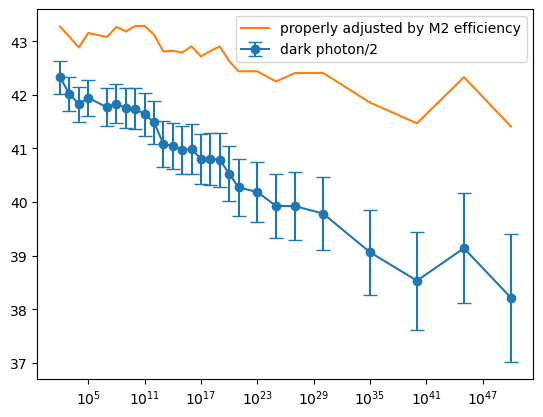

In [27]:
# plt.errorbar(threshold_list, efficiency_list1, yerr=efficiency_list1_err, fmt='o-', capsize=5)
threshold_list = m1_dark_threshold_list
plt.errorbar(threshold_list, tempr, yerr=tempr_err, fmt='o-', capsize=5, label='dark photon/2')

# Figure out error bar for this plot below 
# plt.plot(threshold_list, tempr)
plt.plot(threshold_list, temperature1, label='properly adjusted by M2 efficiency')
plt.xscale('log')
plt.legend()
# plt.yscale('log')

In [173]:
ff = 3.568
nn = 0.0159
48*ff/(np.log(1+1/nn))

41.19684960392482

In [141]:
dark_counts

array([0.008285, 0.007665, 0.0068  , 0.00649 , 0.00535 , 0.00503 ,
       0.004495, 0.004295, 0.00381 , 0.003605, 0.00333 , 0.00307 ,
       0.002895, 0.00263 , 0.002485, 0.00227 , 0.00213 , 0.00188 ,
       0.00171 , 0.00145 , 0.001205, 0.00099 , 0.000775, 0.000575,
       0.000395, 0.00025 , 0.000155])

In [142]:
def find_zero_point(f, a, b, tolerance=1e-6, max_iterations=100):
    """
    Find the zero point of a monotonic function f(x) using the bisection method.
    
    Parameters:
        f (callable): The monotonic function f(x).
        a (float): The start of the interval [a, b].
        b (float): The end of the interval [a, b].
        tolerance (float): The accuracy of the result.
        max_iterations (int): The maximum number of iterations to perform.
    
    Returns:
        float: The zero point x0 where f(x0) ≈ 0.
    
    Raises:
        ValueError: If f(a) and f(b) do not have opposite signs.
    """
    if f(a) * f(b) > 0:
        raise ValueError("The function must have opposite signs at the endpoints of the interval.")
    
    iteration = 0
    while (b - a) / 2 > tolerance and iteration < max_iterations:
        mid = (a + b) / 2
        f_mid = f(mid)
        
        if f_mid == 0:  # Found exact zero
            return mid
        elif f_mid * f(a) < 0:
            b = mid
        else:
            a = mid
        
        iteration += 1
    
    return (a + b) / 2  # Return the midpoint as the best estimate

# Define a monotonic function f(x)
def f(x):
    f1 = 4.984
    f2 = 5.158
    yita1 = 0.8
    yita2 = 0.6
    nbar = 0.004
    return yita1/(-1+np.exp(48*f1/x))+yita2/(-1+np.exp(48*f2/x))-nbar

# Find the zero point in the interval [0, 3]
x0 = find_zero_point(f, 30,70)
print(x0)

41.39483034610748


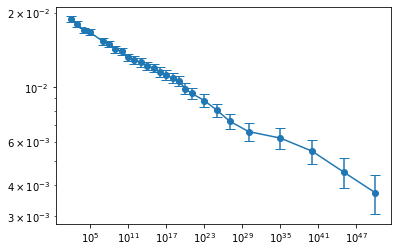

In [143]:
# plt.errorbar(threshold_list, efficiency_list1, yerr=efficiency_list1_err, fmt='o-', capsize=5)
plt.errorbar(threshold_list, thermal_photon_population, yerr=thermal_photon_population_err, fmt='o-', capsize=5)
# plt.plot(threshold_list, efficiency_list)
plt.xscale('log')
plt.yscale('log')

<ipython-input-148-48c42bdafdf7>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("coolwarm")


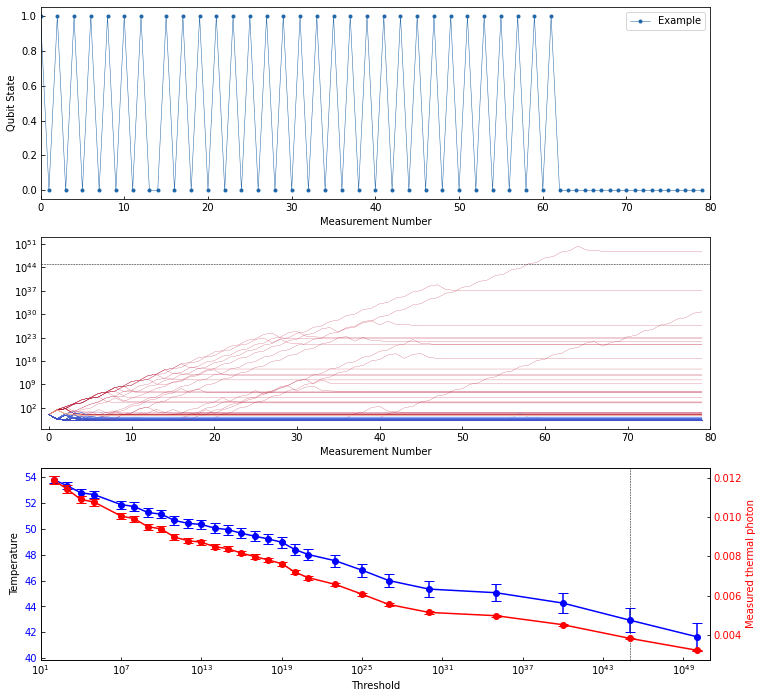

In [148]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# Plot BBQ data
# ax.plot(bbqy*1e3, bbqx, ':', color='red', label='Simulation')

# Plot the first dataset
ax[0].plot(np.array(oscil_pattern),'-o', color='#2066A8',label='Example',lw=0.5,markersize=3)




# Add labels and title
ax[0].set_xlabel('Measurement Number')
ax[0].set_ylabel('Qubit State')
# ax[0].set_title('Parity measurement')
ax[0].set_xlim([0,80])
# ax.set_ylim([0,1])
ax[0].legend()
ax[0].tick_params(which='both', direction='in')
# fig.savefig('C1S2_long.pdf')

for x in ratio:
    norm = matplotlib.colors.Normalize(
        vmin=1e-20, vmax=1
    )
    cmap = matplotlib.cm.get_cmap("coolwarm")
    color = cmap(norm(x[-1]))
    ax[1].semilogy(
        x, "-", linewidth=0.2, alpha=1, color=color
    )    
ax[1].tick_params(which='both', direction='in')
ax[1].set_xlabel('Measurement Number')
ax[1].axhline(y=1e45, color='black', linestyle='--', linewidth=0.5)

# Plot the first dataset
# dark_counts1
ax[2].errorbar(threshold_list, temperature1, color='b', yerr=tempr_err, fmt='o-', capsize=5)
# Add labels and title
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('Temperature')
ax[2].axvline(x=1e45, color='black', linestyle='--', linewidth=0.5)
# ax[2].set_title('Threshold')
ax[2].set_xscale('log')
dark_counts1_err
ax2 = ax[2].twinx()
ax2.errorbar(threshold_list, dark_counts1, yerr=dark_counts_err, fmt='o-', color='r', capsize=5)
ax2.set_ylabel('Measured thermal photon', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax[2].tick_params(which='both', direction='in')
ax2.tick_params(which='both', direction='in')
ax[2].tick_params(axis='y', labelcolor='b')

ax[1].set_xlim([-1,80])
ax[2].set_xlim([min(threshold_list)/10,max(threshold_list)*10])

fig.savefig('temperature.pdf')

plt.show()

In [175]:
dark_counts_err

array([2.02686442e-04, 1.95015996e-04, 1.83762891e-04, 1.79553333e-04,
       1.63116178e-04, 1.58188165e-04, 1.49579326e-04, 1.46228468e-04,
       1.37758555e-04, 1.34014999e-04, 1.28819857e-04, 1.23704792e-04,
       1.20137816e-04, 1.14522555e-04, 1.11328900e-04, 1.06415391e-04,
       1.03088872e-04, 9.68624179e-05, 9.23871176e-05, 8.50851779e-05,
       7.75740928e-05, 7.03214014e-05, 6.22253716e-05, 5.36036088e-05,
       4.44321941e-05, 3.53509194e-05, 2.78366642e-05])

In [158]:
efficiency_list1_err = np.sqrt(efficiency_list1*(1-efficiency_list1)/n)
efficiency_list2_err = np.sqrt(m2*(1-m2)/1e5)

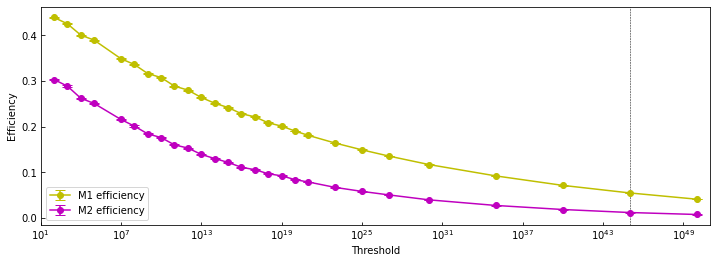

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
plt.errorbar(threshold_list, efficiency_list1, color='y', yerr=efficiency_list1_err, fmt='o-', capsize=5, label='M1 efficiency')
# plt.plot(threshold_list, efficiency_list1, '-o', label='M1 efficiency')
plt.errorbar(threshold_list, m2, color='m', yerr=efficiency_list2_err, fmt='o-', capsize=5, label='M2 efficiency')
# plt.plot(threshold_list, m2, '-o', label='M2 efficiency')
plt.axvline(x=1e45, color='black', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.xlim([min(threshold_list)/10,max(threshold_list)*10])
plt.legend()
plt.tick_params(which='both', direction='in')
plt.xlabel('Threshold')
plt.ylabel('Efficiency')
plt.savefig('efficiency.pdf')

# now calculating all temperatures

In [176]:
file_path1 = 'H:\\共享云端硬盘\\SLab\\Multimode\\experiment\\240911\\RAM_paper_results\\datasets\\'
file_name1 = 'Cavity_Temp_Parity_Full.csv'
# Load CSV file
data1 = pd.read_csv(file_path1+file_name1)

# Display the first few rows
print(data1.keys())

Index(['file_name', 'mode', 'T', 'E', 'threshold_list', 'counts_list',
       'man_no_for_parity', 'reset', 'single_photon'],
      dtype='object')


In [178]:
data1['mode']

0        M1
1        M2
2        M1
3     M1-S1
4     M1-S2
5     M1-S3
6     M1-S4
7     M1-S5
8     M1-S6
9     M1-S7
10    M1-D1
11     M1-C
12       M2
13    M2-D2
14       M1
15       M2
16       M1
17    M1-S1
18    M1-S2
19    M1-S3
20    M1-S4
21    M1-S5
22    M1-S6
23    M1-S7
24    M1-D1
25     M1-C
26       M2
27    M2-D2
Name: mode, dtype: object

In [181]:
data1['counts_list'][3]

'[1585, 1383, 1262, 1135, 947, 825, 771, 695, 632, 596, 536, 482, 452, 403, 371, 329, 291, 277, 241, 192, 155, 124, 89, 58, 39, 21, 10]'